## Importing Packages


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Getting Data

In [2]:
DataFile = pd.read_csv('sales_data.csv')

## Showing Data

In [3]:
DataFile.head()

date     product     category   price  quantity  revenue
0  2022-01-01  Smartphone  Electronics   600.0      10.0   6000.0
1  2022-01-01      Laptop  Electronics  1200.0       5.0   6000.0
2  2022-01-02     T-Shirt     Clothing    20.0      50.0   1000.0
3  2022-01-03  Headphones  Electronics   100.0      20.0   2000.0
4  2022-01-04     T-Shirt     Clothing    20.0      25.0    500.0

In [4]:
DataFile.info()
# As You See At INFO The Data Is Clean And Have No Null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      369 non-null    object 
 1   product   369 non-null    object 
 2   category  369 non-null    object 
 3   price     367 non-null    float64
 4   quantity  368 non-null    float64
 5   revenue   368 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.4+ KB


## Cleanin  Data

In [5]:
#The Data Is Clean But for Make Sure 
DataFile.dropna()

date     product     category   price  quantity  revenue
0    2022-01-01  Smartphone  Electronics   600.0      10.0   6000.0
1    2022-01-01      Laptop  Electronics  1200.0       5.0   6000.0
2    2022-01-02     T-Shirt     Clothing    20.0      50.0   1000.0
3    2022-01-03  Headphones  Electronics   100.0      20.0   2000.0
4    2022-01-04     T-Shirt     Clothing    20.0      25.0    500.0
..          ...         ...          ...     ...       ...      ...
364  2022-12-27       Watch  Accessories   150.0       5.0    750.0
365  2022-12-28        Coat     Clothing   100.0       5.0    500.0
366  2022-12-29  Headphones  Electronics   100.0      10.0   1000.0
367  2022-12-30  Smartphone  Electronics   600.0      11.0   6600.0
368  2022-12-31      Hoodie     Clothing    40.0      30.0   1200.0

[365 rows x 6 columns]

## Make Calculations

In [6]:
# Calculate total revenue
TotalRevenue = round ( DataFile['revenue'].sum() )

# Find product with the highest revenue and it's Value
HighestRevenueProduct = DataFile['product'][DataFile['revenue'].idxmax()]
HighestProductRevenue = round ( DataFile['revenue'].max() )

# Calculate average price
AveragePrice = round ( DataFile['price'].mean() ,2)

# Calculate total quantity
TotalQuantity = round ( DataFile['quantity'].sum() )

# Find category with the highest revenue and it's Value
category_revenue = DataFile.groupby('category')['revenue'].sum()
HighestRevenueCategory = category_revenue.idxmax()
HighestCategoryRevenue = round ( category_revenue.max() )

# Calculate average revenue per sale
AverageRevenuePerSale = round ( DataFile['revenue'].mean() ,2)

# Calculate total revenue in each quarter
DataFile['date'] = pd.to_datetime(DataFile['date'])  # Convert date column to datetime
DataFile['quarter'] = DataFile['date'].dt.quarter    # Add a new column for quarter
RevenuePerQuarter = DataFile.groupby('quarter')['revenue'].sum()

## Answering The Questions 

In [7]:
# Print the results
print(f"The Total revenue generated by the company Is : {TotalRevenue} $\n")

print(f"The Product with the highest revenue Is : {HighestRevenueProduct} By {HighestProductRevenue} $\n")

print(f"The Average price of a product sold Is : {AveragePrice} $\n")

print(f"The Total quantity of products sold Is : {TotalQuantity} Product\n")

print(f"THe Category with the highest revenue Is : {HighestRevenueCategory} By {HighestCategoryRevenue} $\n")

print(f"The Average revenue per sale Is : {AverageRevenuePerSale} $\n\n")

print("Total revenue generated in each Quarter\n")
print(RevenuePerQuarter)

The Total revenue generated by the company Is : 758330 $

The Product with the highest revenue Is : Smartphone By 7200 $

The Average price of a product sold Is : 211.23 $

The Total quantity of products sold Is : 5360 Product

THe Category with the highest revenue Is : Electronics By 516080 $

The Average revenue per sale Is : 2060.68 $


Total revenue generated in each Quarter

quarter
1    182100.0
2    183970.0
3    197680.0
4    194580.0
Name: revenue, dtype: float64


## Graphs

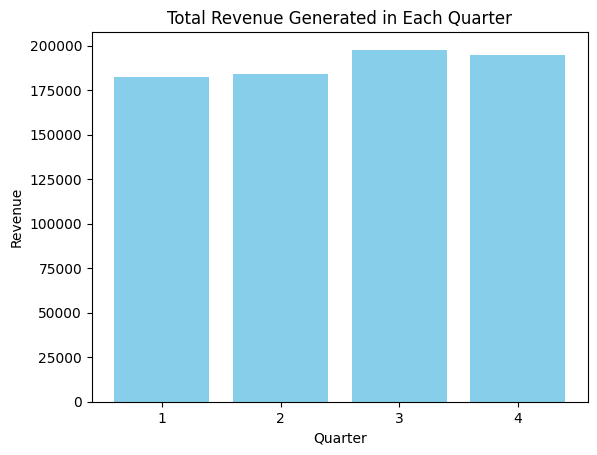

In [8]:
# Define the color for the bars (sky color)
bar_color = '#87CEEB'  # Hex color code for sky blue

# Plotting the revenue per quarter
plt.bar(RevenuePerQuarter.index, RevenuePerQuarter.values, color=bar_color)
plt.xlabel('Quarter')
plt.ylabel('Revenue')
plt.title('Total Revenue Generated in Each Quarter')
plt.xticks(RevenuePerQuarter.index)
plt.show()